In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from vowpalwabbit import pyvw
from vowpalwabbit.DFtoVW import (
    DFtoVW,
    Feature,
    MulticlassLabel,
    MultiLabel,
    Namespace,
    SimpleLabel,
)
import tensorwatch as tw
from datetime import datetime
import time 

%matplotlib notebook

In [2]:
df = pd.read_csv('./Iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# converting "Species" categorical column to integer
def categorical_to_int(specie):
    if specie == 'Iris-setosa':
        return 1
    elif specie == 'Iris-versicolor':
        return 2
    elif specie == 'Iris-virginica':
        return 3
    
df['Species'] = df['Species'].apply(categorical_to_int)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [5]:
target_col = "Species"
# features = [Feature(col) for col in df.columns if col != target_col]  # target column not part of Features
features = [Feature(col) for col in df.columns if col != target_col and col != 'Id']  # 'Id' column also not part of Features along with target col
label = MulticlassLabel(label=target_col)  # target column is a multi class label column
tag = 'Id'

df_to_vw = DFtoVW(df=df, features=features, label=label, tag=tag)

In [6]:
vw_formatted_data = df_to_vw.convert_df()   # Converting dataframe to vw required string format
print("Total vw formatted strings:", len(vw_formatted_data))
vw_formatted_data

Total vw formatted strings: 150


['1 1| SepalLengthCm:5.1 SepalWidthCm:3.5 PetalLengthCm:1.4 PetalWidthCm:0.2',
 '1 2| SepalLengthCm:4.9 SepalWidthCm:3.0 PetalLengthCm:1.4 PetalWidthCm:0.2',
 '1 3| SepalLengthCm:4.7 SepalWidthCm:3.2 PetalLengthCm:1.3 PetalWidthCm:0.2',
 '1 4| SepalLengthCm:4.6 SepalWidthCm:3.1 PetalLengthCm:1.5 PetalWidthCm:0.2',
 '1 5| SepalLengthCm:5.0 SepalWidthCm:3.6 PetalLengthCm:1.4 PetalWidthCm:0.2',
 '1 6| SepalLengthCm:5.4 SepalWidthCm:3.9 PetalLengthCm:1.7 PetalWidthCm:0.4',
 '1 7| SepalLengthCm:4.6 SepalWidthCm:3.4 PetalLengthCm:1.4 PetalWidthCm:0.3',
 '1 8| SepalLengthCm:5.0 SepalWidthCm:3.4 PetalLengthCm:1.5 PetalWidthCm:0.2',
 '1 9| SepalLengthCm:4.4 SepalWidthCm:2.9 PetalLengthCm:1.4 PetalWidthCm:0.2',
 '1 10| SepalLengthCm:4.9 SepalWidthCm:3.1 PetalLengthCm:1.5 PetalWidthCm:0.1',
 '1 11| SepalLengthCm:5.4 SepalWidthCm:3.7 PetalLengthCm:1.5 PetalWidthCm:0.2',
 '1 12| SepalLengthCm:4.8 SepalWidthCm:3.4 PetalLengthCm:1.6 PetalWidthCm:0.2',
 '1 13| SepalLengthCm:4.8 SepalWidthCm:3.0 PetalL

In [7]:
vw = pyvw.vw('--oaa 3 -P 1')  # -oaa is One Agent All algo for multi class problem (seems supervised) -P 1 outputs metrics for each example

In [8]:
# watcher.close()
watcher = tw.Watcher('test.log')
avg_loss_tw = watcher.create_stream('average_loss')
since_last_tw = watcher.create_stream('since_last')

[Debug][0]: FileStream started : /home/muhammadammarabid/jupyter/rlosfest/09-vw-tensorwatch/test.log : t=12.78


In [9]:
# logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")  # logs directory
# sum_loss = 0.
# weighted_examples = 0.

# if isinstance(vw_to_tensorboard, VWtoTensorboard):
#     file_writer = tx.SummaryWriter(vw_to_tensorboard.logdir)   # creating file writer

# sum_loss = 0.
# weighted_examples = 0.

# for iteration, vw_format in enumerate(self.vw_formatted_data):
#     example = self.vw.parse(vw_format)       # parse the string format, it returns an example object
#     self.vw.learn(example)                  # learn on example

#     label = pyvw.get_label(example, self.vw.get_label_type())
#     prediction = pyvw.get_prediction(example, self.vw.get_prediction_type())
#     num_features = example.get_feature_number()    

#     self.vw.finish_example(example)  # Any use of vw object should be done after this and use of example before this 

#     if (print_metrics or vw_to_tensorboard):
#         sum_loss_since_last = self.vw.get_sum_loss() - sum_loss  # vw.get_sum_loss() return current sum loss, sum_loss variable right now holds sum loss of previous iteration
#         weighted_examples_since_last = self.vw.get_weighted_examples() - weighted_examples  # vw.get_weighted_examples() return current weighted examples(sum),  weighted_examples variable right now holds weighted examples of previous iteration		        

#         sum_loss = self.vw.get_sum_loss()  # Now sum_loss no longer hold previous iteration's sum_loss
#         weighted_examples = self.vw.get_weighted_examples()  # Now weighted_examples no longer hold previous iteration's weighted examples

#         average_loss = (sum_loss / weighted_examples) if weighted_examples != 0  else 0.0
#         since_last = (sum_loss_since_last / weighted_examples_since_last) if weighted_examples_since_last != 0  else 0.0

#     if print_metrics:
#         self._print_metrics(average_loss, since_last, label, prediction, num_features)

#     if isinstance(vw_to_tensorboard, VWtoTensorboard):
#         file_writer.add_scalar('average_loss', average_loss, iteration)  # logging average_loss on each iteration
#         file_writer.add_scalar('since_last', since_last, iteration)   # logging since_last on each iteration
#     #     file_writer.add_scalar('label' , label, iteration)
#     #     file_writer.add_scalar('prediction', prediction, iteration)
#     #     file_writer.add_histogram('label-prediction', [label, prediction], iteration)
#     #     file_writer.add_histogram('label', label, iteration)
#     #     file_writer.add_histogram('prediction', prediction, iteration)
#         file_writer.add_scalar('num_features', num_features, iteration)

In [16]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")  # logs directory


sum_loss = 0.
weighted_examples = 0.

for iteration, vw_format in enumerate(vw_formatted_data):
    vw.learn(vw_format)
    
    sum_loss_since_last = vw.get_sum_loss() - sum_loss   
    weighted_examples_since_last = vw.get_weighted_examples() - weighted_examples  
        
    sum_loss= vw.get_sum_loss()
    weighted_examples = vw.get_weighted_examples()
    
    average_loss = (sum_loss / weighted_examples) if weighted_examples != 0  else 0.0
    since_last = (sum_loss_since_last / weighted_examples_since_last) if weighted_examples_since_last != 0  else 0.0


    print( 'average_loss:{:.6f}'.format(average_loss) , end='\t')
    print('since_last:{:.6f}'.format(since_last))
    time.sleep(0.01)
    avg_loss_tw.write( (iteration, average_loss) )
    since_last_tw.write( (iteration, since_last) )

average_loss:0.057650	since_last:0.057650
average_loss:0.057522	since_last:0.000000
average_loss:0.057395	since_last:0.000000
average_loss:0.057269	since_last:0.000000
average_loss:0.057143	since_last:0.000000
average_loss:0.057018	since_last:0.000000
average_loss:0.056893	since_last:0.000000
average_loss:0.056769	since_last:0.000000
average_loss:0.056645	since_last:0.000000
average_loss:0.056522	since_last:0.000000
average_loss:0.056399	since_last:0.000000
average_loss:0.056277	since_last:0.000000
average_loss:0.056156	since_last:0.000000
average_loss:0.056034	since_last:0.000000
average_loss:0.055914	since_last:0.000000
average_loss:0.055794	since_last:0.000000
average_loss:0.055675	since_last:0.000000
average_loss:0.055556	since_last:0.000000
average_loss:0.055437	since_last:0.000000
average_loss:0.055319	since_last:0.000000
average_loss:0.055202	since_last:0.000000
average_loss:0.055085	since_last:0.000000
average_loss:0.054968	since_last:0.000000
average_loss:0.054852	since_last:0

[Debug][0]: FileStream started : /home/muhammadammarabid/jupyter/rlosfest/09-vw-tensorwatch/test.log : t=110.56
[Debug][0]: FileStream started : /home/muhammadammarabid/jupyter/rlosfest/09-vw-tensorwatch/test.log : t=110.57


<IPython.core.display.Javascript object>


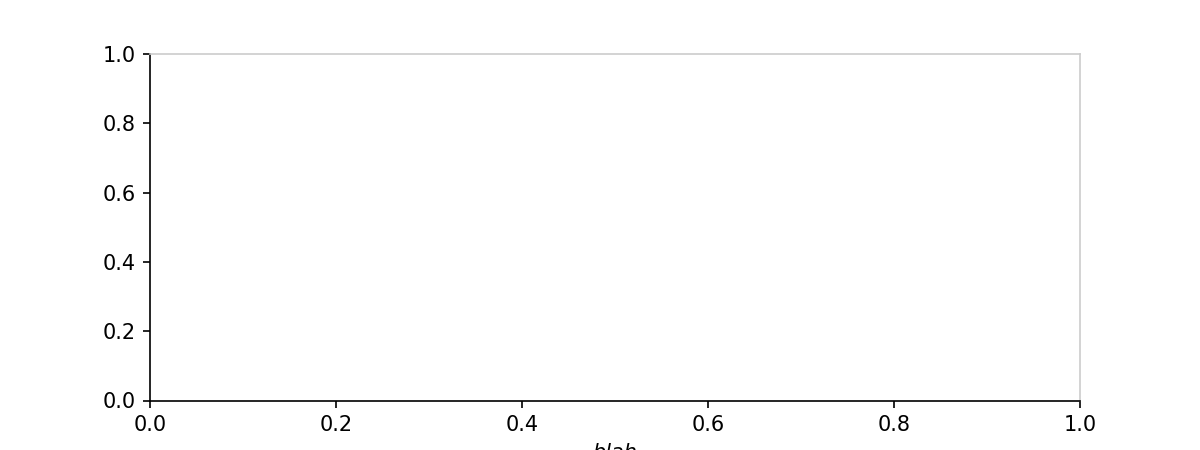

<IPython.core.display.Javascript object>


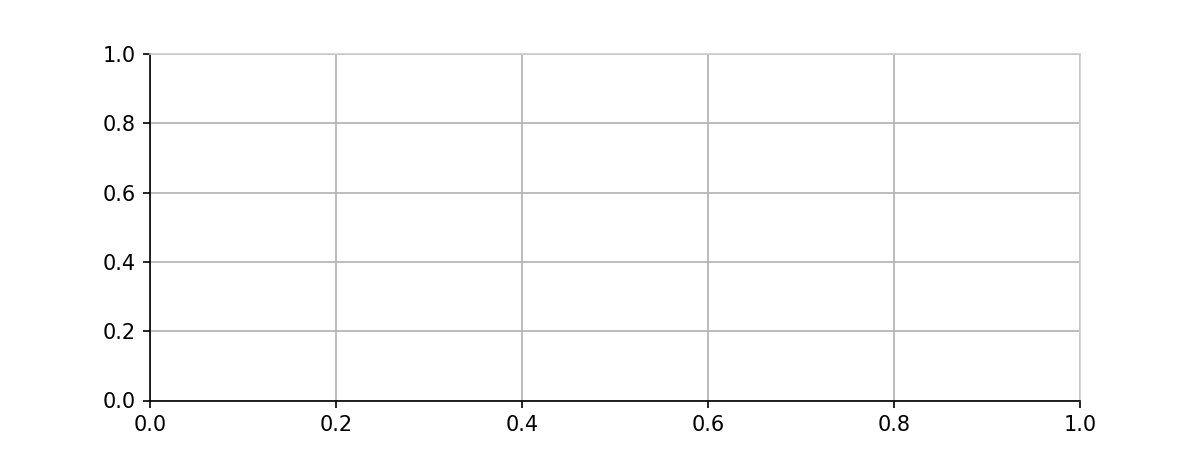

In [15]:
client = tw.WatcherClient('test.log')
avg_loss_tw = client.open_stream('average_loss')
since_last_tw = client.open_stream('since_last')

avg_plot = tw.Visualizer(avg_loss_tw, vis_type='bar', xtitle='blah')
avg_plot.show()

since_last_plot = tw.Visualizer(since_last_tw, vis_type='line')
since_last_plot.show()

ERROR:asyncio:Exception in callback BaseAsyncIOLoop._handle_events(57, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(57, 1)>
Traceback (most recent call last):
  File "/home/muhammadammarabid/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 139, in _handle_events
    handler_func(fileobj, events)
  File "/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 452, in _handle_events
    zmq_events = self.socket.EVENTS
  File "/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/zmq/sugar/attrsettr.py", line 48, in __getattr__
    return self._get_attr_opt(upper_key, opt)
  File "/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/zmq/sugar/attrsettr.py", line 52, in _get_attr_opt
    return self.get(opt)
  File "zmq/backend/cython/socket.pyx", line 472, in zmq

AttributeError: 'NoneType' object has no attribute 'name'